# Crime in Toronto's Neighbourhoods


This is an ongoing project that uses data from Toronto's [Open Data](http://www1.toronto.ca/wps/portal/contentonly?vgnextoid=9e56e03bb8d1e310VgnVCM10000071d60f89RCRD), which consists of over 200 datasets provided by the City of Toronto. These datasets are organized into 15 different categories.

Toronto is considered to be a safe city in comparison to other big cities. In an article in the Economist (2015), Toronto was ranked as the safest major city in North America and the eighth safest major city in the world, as cited in [Wikipedia](https://en.wikipedia.org/wiki/Crime_in_Toronto).

Despite being a relatively safer city, Toronto has its fair share of crime. The city consists of 140 officially recognized neighbourhoods along with several other unofficial, smaller neighbourhoods. As is the case with any big city, some neighbourhoods are considered to be less safe than others. Several reasons are attributed to higher crime – lower income, lower literacy and access to education, unemployment leading to illegal drug activity etc. An analysis of crime and neighbourhood data within Toronto will provide us with a good understanding of how many of these assumptions are true and to what degree. It might additionally reveal hidden patterns, trends or relationships between some independent variables and our dependent variable (e.g. major crimes) that would not be obvious. 

For this project, I will focus only on crime in Toronto’s 140 official neighbourhoods, and explore the following topics in no particular order. 

1) I will provide a summarized visualization of all the major crimes in Toronto. I might have to do some type of normalization (e.g. divide the number of crimes in a neighbourhood by the population of that neighbourhood).

2) I will compare 3-5 most crime prone neighbourhoods against 3-5 least crime prone neighbourhoods.
 
3) What is the difference in these neighbourhoods as regards median household income and education? Which is the most prominent age group of people? Does this in any way affect crime?

4) My dataset provides me with data only for two years – 2008 and 2011. I plan to compare crime data for both years. Has anything changed from 2008 to 2011?

5) What is the neighbourhood with the most change?

6) What could be the reasons for this change? Can the data give us an answer?

7) Finally, I will try to come up with something predictive (using machine learning). This would be more speculative as the data does not afford any type of validation, given that I have only two years of data. But this would still be helpful as a predictive tool in the current climate of ongoing gentrification projects in Toronto since the last 4-5 years, coinciding with a significant increase in the construction of large-to-midsize condominium buildings in various neighbourhoods, undoubtedly changing the social demographics of the city.

#### Import all the libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

#### Seaborn settings

In [2]:
# seaborn setting
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8,4)})

#### Read the data files as pandas dataframes

In [3]:
c = pd.read_csv('TorontoCrime2011.csv')
d = pd.read_csv('TorontoDemographics2011.csv')

# Also read in the 2008 data files
c2 = pd.read_csv('TorontoCrime2008.csv')
d2 = pd.read_csv('TorontoDemographics2008.csv')

#### Let's take a quick look at the top few rows of the 2011 and 2008 Toronto Crime dataframes.

In [4]:
#2011 dataframe
c.head()

,Neighbourhood,Neighbourhood Id,Arsons,Assaults,Break & Enters,Drug Arrests,Fire Medical Calls,Fire Vehicle Incidents,Fires & Fire Alarms,Hazardous Incidents,Murders,Robberies,Sexual Assaults,Thefts,Total Major Crime Incidents,Vehicle Thefts
0,West Humber-Clairville,1,4,390,175,62,1321,502,705,210,0,82,68,54,1119,288
1,Mount Olive-Silverstone-Jamestown,2,3,316,61,90,1016,59,361,176,1,78,75,7,690,62
2,Thistletown-Beaumond Heights,3,0,85,36,16,323,48,90,34,0,17,24,2,192,12
3,Rexdale-Kipling,4,0,59,32,15,305,34,94,55,1,16,20,3,164,18
4,Elms-Old Rexdale,5,1,77,25,14,321,71,107,43,0,23,5,19,185,22


In [5]:
#2008 dataframe
c2.head()
#c2.shape()

,Neighbourhood,Neighbourhood Id,Ambulance Calls,Ambulance Referrals,Arsons,Assaults,Break & Enters,Drug Arrests,Fire Vehicle Incidents,Firearms Incidents,Fires & Fire Alarms,Hazardous Incidents,Murders,Robberies,Sexual Assaults,TCHC Safety Incidents,Thefts,Vehicle Thefts
0,West Humber-Clairville,1,3613,10,4,272,193,88,674,3,135,269,1,85,21,62,42,341
1,Mount Olive-Silverstone-Jamestown,2,2229,5,0,269,88,145,52,11,70,163,0,80,23,426,6,113
2,Thistletown-Beaumond Heights,3,793,5,0,66,30,27,20,0,26,48,0,23,5,89,2,16
3,Rexdale-Kipling,4,664,5,0,49,28,17,14,0,26,64,0,16,6,48,0,25
4,Elms-Old Rexdale,5,836,3,2,49,22,8,45,1,23,52,0,26,3,138,2,17


We notice a few differences between the crime datasets for 2008 and 2011, where 2008 does not have a column for total major crimes. Now, let's take a look at the top few rows of the 2011 and 2008 Toronto Demographics dataframes.

In [6]:
# 2011 dataframe
d.head()

,Neighbourhood,Neighbourhood Id,Total Area,Total Population,Pop - Males,Pop - Females,Pop 0 - 4 years,Pop 5 - 9 years,Pop 10 - 14 years,Pop 15 -19 years,...,Language - Chinese,Language - Italian,Language - Korean,Language - Persian (Farsi),Language - Portuguese,Language - Russian,Language - Spanish,Language - Tagalog,Language - Tamil,Language - Urdu
0,West Humber-Clairville,1,30.09,34100,17095,17000,1865,1950,2155,2550,...,475,925,95,160,205,15,1100,850,715,715
1,Mount Olive-Silverstone-Jamestown,2,4.60,32790,16015,16765,2575,2535,2555,2620,...,275,750,60,350,115,50,820,345,1420,1075
2,Thistletown-Beaumond Heights,3,3.40,10140,4920,5225,575,580,670,675,...,95,705,35,115,105,15,570,130,120,300
3,Rexdale-Kipling,4,2.50,10485,5035,5455,495,520,570,665,...,95,475,30,95,145,30,700,180,70,215
4,Elms-Old Rexdale,5,2.90,9550,4615,4935,670,720,720,725,...,90,510,55,285,80,30,670,195,60,140


In [7]:
# 2008 dataframe
# We notice that the 2008 dataset has more columns
d2.head()

,Neighbourhood,Neighbourhood Id,Total Area,Total Population,Pop - Males,Pop - Females,Pop 0 - 4 years,Pop 5 - 9 years,Pop 10 - 14 years,Pop 15 -19 years,...,Home Repairs Needed,Tenant Average Rent,Low Income Families,Low Income Singles,Low Income Children,Family Income Category,Average Family Income,Household Income Category,Pre-Tax Household Income,After-Tax Household Income
0,West Humber-Clairville,1,30.09,32265,16295,15960,2005,2135,2325,2180,...,365,850,7720,725,643,7720,67240,8960,63415,63977
1,Mount Olive-Silverstone-Jamestown,2,4.60,32130,15900,16230,2680,2680,2685,2285,...,980,875,7715,1177,1206,7720,52745,9265,48145,49601
2,Thistletown-Beaumond Heights,3,3.40,9925,4900,5035,615,625,645,630,...,185,875,2520,305,161,2520,71300,3150,55030,54910
3,Rexdale-Kipling,4,2.50,10725,5205,5525,580,645,665,640,...,300,835,2780,653,135,2775,65215,3880,52430,53779
4,Elms-Old Rexdale,5,2.90,9440,4615,4820,725,700,745,655,...,320,895,2560,255,328,2555,56515,3130,53780,55054


**We can do a quick check to see if there are any missing values in the data**

In [8]:
# Drop any missing values, and check to see if any rows have been dropped
if c.shape == c.dropna().shape:
    print "2011 Crime data has no missing values. Dataframe dimensions are" + str(c.shape)
if d.shape == d.dropna().shape:
    print "2011 Demographics data has no missing values. Dataframe dimensions are" + str(d.shape)
if c2.shape == c2.dropna().shape:
    print "2008 Crime data has no missing values. Dataframe dimensions are" + str(c2.shape)
if d2.shape == d2.dropna().shape:
    print "2008 Demographics data has no missing values. Dataframe dimensions are" + str(d2.shape)

2011 Crime data has no missing values. Dataframe dimensions are(140, 16)
2011 Demographics data has no missing values. Dataframe dimensions are(140, 39)
2008 Crime data has no missing values. Dataframe dimensions are(140, 18)
2008 Demographics data has no missing values. Dataframe dimensions are(140, 85)


**The rows for all these dataframes are listed by neighbourhood. The 140 rows indicate all official neighbourhoods of Toronto. We noticed a difference between the crime datasets in 2011 and 2008, which is reflected in the dimensions and in the column names. We can take a quick look at all the columns to get an idea.**

In [9]:
c.columns #2011

Index([u'Neighbourhood', u'Neighbourhood Id', u'Arsons', u'Assaults',
       u'Break & Enters', u'Drug Arrests', u'Fire Medical Calls',
       u'Fire Vehicle Incidents', u'Fires & Fire Alarms',
       u'Hazardous Incidents', u'Murders', u'Robberies', u'Sexual Assaults',
       u'Thefts', u'Total Major Crime Incidents', u'Vehicle Thefts'],
      dtype='object')

In [10]:
c2.columns #2008

Index([u'Neighbourhood', u'Neighbourhood Id', u'Ambulance Calls',
       u'Ambulance Referrals', u'Arsons', u'Assaults', u'Break & Enters',
       u'Drug Arrests', u'Fire Vehicle Incidents', u'Firearms Incidents',
       u'Fires & Fire Alarms', u'Hazardous Incidents', u'Murders',
       u'Robberies', u'Sexual Assaults', u'TCHC Safety Incidents', u'Thefts',
       u'Vehicle Thefts'],
      dtype='object')

**To make data access and manipulation easier, we can change the column names to shorter, manageable ones.**

In [11]:
# Rename columns of 2011 crime dataframe
c.rename(columns={'Neighbourhood':'N','Neighbourhood Id':'NId','Arsons':'Ars','Assaults':'Ass',
       'Break & Enters':'BE','Drug Arrests':'DA','Fire Medical Calls':'FMC',
       'Fire Vehicle Incidents':'FVI','Fires & Fire Alarms':'FFA',
       'Hazardous Incidents':'HI','Murders':'M','Robberies':'R','Sexual Assaults':'SA',
       'Thefts':'T','Total Major Crime Incidents':'TMCI','Vehicle Thefts':'VT'}, inplace=True)
c.tail()

,N,NId,Ars,Ass,BE,DA,FMC,FVI,FFA,HI,M,R,SA,T,TMCI,VT
135,West Hill,136,3,387,102,87,1145,78,338,142,1,71,52,3,749,46
136,Woburn,137,2,412,128,77,1469,219,504,223,3,107,29,7,808,45
137,Eglinton East,138,0,239,88,48,720,76,223,111,1,66,17,10,492,23
138,Scarborough Village,139,1,226,93,31,652,35,180,94,1,62,31,3,474,27
139,Guildwood,140,0,44,32,9,284,24,48,48,0,14,7,2,113,5


In [12]:
# Rename columns of 2008 crime dataframe. Column names comparable to 2011 will have suffix "2"
c2.rename(columns={'Neighbourhood':'N','Neighbourhood Id':'NId','Ambulance Calls':'AC2',
       'Ambulance Referrals':'AR2','Arsons':'Ars2','Assaults':'Ass2','Break & Enters':'BE2',
       'Drug Arrests':'DA2','Fire Vehicle Incidents':'FVI2','Firearms Incidents':'FI2',
       'Fires & Fire Alarms':'FFA2','Hazardous Incidents':'HI2','Murders':'M2',
       'Robberies':'R2','Sexual Assaults':'SA2','TCHC Safety Incidents':'TCHCSI2','Thefts':'T2',
       'Vehicle Thefts':'VT2'},inplace=True)
c2.tail()

,N,NId,AC2,AR2,Ars2,Ass2,BE2,DA2,FVI2,FI2,FFA2,HI2,M2,R2,SA2,TCHCSI2,T2,VT2
135,West Hill,136,2323,10,3,357,90,179,74,7,111,181,0,59,28,721,9,70
136,Woburn,137,3607,29,2,325,129,72,254,9,118,196,1,78,17,373,15,152
137,Eglinton East,138,1500,8,1,171,83,105,92,5,67,104,2,45,10,285,3,92
138,Scarborough Village,139,1364,10,1,170,52,74,37,7,62,95,3,35,8,276,3,57
139,Guildwood,140,688,0,0,50,30,20,17,0,33,51,0,12,2,0,0,12


**Our focus for this data story will mainly be on major crime incidents.** 

**Eight categories of crimes fall under major crime - Assaults, Break & Enters, Drug Arrests, Murders, Robberies, Sexual Assaults, Thefts, and Vehicle Thefts.**

**We notice that the 2008 crime dataframe does not have a column for total major crime incidents. So, let's add one.**

In [13]:
# We can add a column called "Total Major Crime Incidents" in the 2008 dataframe to facilitate comparisons
c2['TMCI2'] = c2['Ass2'] + c2['BE2'] + c2['DA2'] + c2['M2'] + c2['R2'] + c2['SA2'] + c2['T2'] + c2['VT2'] 
c2.tail()

,N,NId,AC2,AR2,Ars2,Ass2,BE2,DA2,FVI2,FI2,FFA2,HI2,M2,R2,SA2,TCHCSI2,T2,VT2,TMCI2
135,West Hill,136,2323,10,3,357,90,179,74,7,111,181,0,59,28,721,9,70,792
136,Woburn,137,3607,29,2,325,129,72,254,9,118,196,1,78,17,373,15,152,789
137,Eglinton East,138,1500,8,1,171,83,105,92,5,67,104,2,45,10,285,3,92,511
138,Scarborough Village,139,1364,10,1,170,52,74,37,7,62,95,3,35,8,276,3,57,402
139,Guildwood,140,688,0,0,50,30,20,17,0,33,51,0,12,2,0,0,12,126


**It might be the case that a certain neighbourhood has more major crimes just because of more people living in it. This would be a confounding variable. So, to compare crime data across each neighbourhood, and across two years (2008 and 2011 in our case), it makes sense to normalize the data by dividing each neighbourhood with its population. Let's use the demographic data for population.** 

In [14]:
d.columns #2011

Index([u'Neighbourhood', u'Neighbourhood Id', u'Total Area',
       u'Total Population', u'Pop - Males', u'Pop - Females',
       u'Pop 0 - 4 years', u'Pop 5 - 9 years', u'Pop 10 - 14 years',
       u'Pop 15 -19 years', u'Pop 20 - 24 years', u'Pop  25 - 29 years',
       u'Pop 30 - 34 years', u'Pop 35 - 39 years', u'Pop 40 - 44 years',
       u'Pop 45 - 49 years', u'Pop 50 - 54 years', u'Pop 55 - 59 years',
       u'Pop 60 - 64 years', u'Pop 65 - 69 years', u'Pop 70 - 74 years',
       u'Pop 75 - 79 years', u'Pop 80 - 84 years', u'Pop 85 years and over',
       u'Seniors 55 and over', u'Seniors 65 and over', u'Child 0-14',
       u'Youth 15-24', u'Home Language Category', u'   Language - Chinese',
       u'   Language - Italian', u'   Language - Korean',
       u'   Language - Persian (Farsi)', u'   Language - Portuguese',
       u'   Language - Russian', u'   Language - Spanish',
       u'   Language - Tagalog', u'   Language - Tamil',
       u'   Language - Urdu'],
      dtype='objec

In [15]:
d2.columns #2008

Index([u'Neighbourhood', u'Neighbourhood Id', u'Total Area',
       u'Total Population', u'Pop - Males', u'Pop - Females',
       u'Pop 0 - 4 years', u'Pop 5 - 9 years', u'Pop 10 - 14 years',
       u'Pop 15 -19 years', u'Pop 20 - 24 years', u'Pop  25 - 29 years',
       u'Pop 30 - 34 years', u'Pop 35 - 39 years', u'Pop 40 - 44 years',
       u'Pop 45 - 49 years', u'Pop 50 - 54 years', u'Pop 55 - 59 years',
       u'Pop 60 - 64 years', u'Pop 65 - 69 years', u'Pop 70 - 74 years',
       u'Pop 75 - 79 years', u'Pop 80 - 84 years', u'Pop 85 years and over',
       u'Pop 6-12 years', u'Visible Minority Category', u'   Chinese',
       u'   South Asian', u'   Black', u'   Filipino', u'   Latin American',
       u'   Southeast Asian', u'   Arab', u'   West Asian', u'   Korean',
       u'   Japanese', u'   Other Visible Minority',
       u'   Multiple Visible Minority', u'   Not a Visible Minority',
       u'Aboriginal', u'Home Language Category', u'   Language - Chinese',
       u'   Languag

**We only need the total population for now, from each neighbourhood, to normalize the crime data.**

In [16]:
d.rename(columns={'Neighbourhood':'N','Neighbourhood Id':'NId','Total Population':'TPop'},inplace=True)
d2.rename(columns={'Neighbourhood':'N','Neighbourhood Id':'NId','Total Population':'TPop2'},inplace=True)

**Now we can compute the number of crimes in each neighbourhood per 1000 people for 2011 and 2008**

In [17]:
c_norm = c
c2_norm = c2
# Divide all the crime data columns by the total neighbourhood population and multiply by 1000
c_norm.iloc[:,2:] = c.iloc[:,2:].div(d['TPop'], axis=0) * 1000
c2_norm.iloc[:,2:] = c2.iloc[:,2:].div(d2['TPop2'], axis=0) * 1000

In [18]:
c_norm.head() #2011 crime data

,N,NId,Ars,Ass,BE,DA,FMC,FVI,FFA,HI,M,R,SA,T,TMCI,VT
0,West Humber-Clairville,1,0.117302,11.436950,5.131965,1.818182,38.739003,14.721408,20.674487,6.158358,0.000000,2.404692,1.994135,1.583578,32.815249,8.445748
1,Mount Olive-Silverstone-Jamestown,2,0.091491,9.637084,1.860323,2.744739,30.985056,1.799329,11.009454,5.367490,0.030497,2.378774,2.287283,0.213480,21.043001,1.890820
2,Thistletown-Beaumond Heights,3,0.000000,8.382643,3.550296,1.577909,31.854043,4.733728,8.875740,3.353057,0.000000,1.676529,2.366864,0.197239,18.934911,1.183432
3,Rexdale-Kipling,4,0.000000,5.627086,3.051979,1.430615,29.089175,3.242728,8.965188,5.245589,0.095374,1.525990,1.907487,0.286123,15.641392,1.716738
4,Elms-Old Rexdale,5,0.104712,8.062827,2.617801,1.465969,33.612565,7.434555,11.204188,4.502618,0.000000,2.408377,0.523560,1.989529,19.371728,2.303665


In [19]:
c2_norm.head() #2008 crime data

,N,NId,AC2,AR2,Ars2,Ass2,BE2,DA2,FVI2,FI2,FFA2,HI2,M2,R2,SA2,TCHCSI2,T2,VT2,TMCI2
0,West Humber-Clairville,1,111.978925,0.309933,0.123973,8.430188,5.981714,2.727414,20.889509,0.092980,4.184100,8.337208,0.030993,2.634434,0.650860,1.921587,1.301720,10.568728,32.326050
1,Mount Olive-Silverstone-Jamestown,2,69.374416,0.155618,0.000000,8.372238,2.738873,4.512916,1.618425,0.342359,2.178649,5.073140,0.000000,2.489885,0.715842,13.258637,0.186741,3.516962,22.533458
2,Thistletown-Beaumond Heights,3,79.899244,0.503778,0.000000,6.649874,3.022670,2.720403,2.015113,0.000000,2.619647,4.836272,0.000000,2.317380,0.503778,8.967254,0.201511,1.612091,17.027708
3,Rexdale-Kipling,4,61.911422,0.466200,0.000000,4.568765,2.610723,1.585082,1.305361,0.000000,2.424242,5.967366,0.000000,1.491841,0.559441,4.475524,0.000000,2.331002,13.146853
4,Elms-Old Rexdale,5,88.559322,0.317797,0.211864,5.190678,2.330508,0.847458,4.766949,0.105932,2.436441,5.508475,0.000000,2.754237,0.317797,14.618644,0.211864,1.800847,13.453390


In [20]:
# Get some overall statistics for 2011
c_norm.describe()

,NId,Ars,Ass,BE,DA,FMC,FVI,FFA,HI,M,R,SA,T,TMCI,VT
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,70.5000,0.060806,8.057472,4.113241,2.026643,34.380419,4.670153,12.966220,6.033728,0.019289,1.859598,0.958315,0.346375,18.899926,1.518993
std,40.5586,0.070187,4.659080,1.548878,2.146247,14.937431,3.003211,8.271300,2.104366,0.037732,1.113830,0.619382,0.298949,8.655682,1.194685
min,1.0000,0.000000,1.739130,1.300390,0.000000,13.194722,0.386349,3.798481,1.583211,0.000000,0.257400,0.089286,0.000000,7.092723,0.274600
25%,35.7500,0.000000,4.419568,2.947731,0.828803,25.980638,2.565404,8.416467,4.673796,0.000000,1.069989,0.516434,0.155055,12.407377,0.871931
50%,70.5000,0.058042,7.205346,3.851444,1.497455,31.418898,3.931834,10.760260,5.882035,0.000000,1.559647,0.825615,0.289292,17.225228,1.310282
75%,105.2500,0.094234,10.542619,5.145270,2.438344,38.636659,6.124180,13.926176,7.285228,0.030836,2.382644,1.297216,0.436619,22.990496,1.753712
max,140.0000,0.367872,28.637891,9.445762,18.516248,111.833231,21.367030,62.186612,13.182097,0.252525,6.409925,2.923812,1.989529,56.468424,9.329248


In [21]:
# Get some overall statistics for 2008
c2_norm.describe()

,NId,AC2,AR2,Ars2,Ass2,BE2,DA2,FVI2,FI2,FFA2,HI2,M2,R2,SA2,TCHCSI2,T2,VT2,TMCI2
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,70.5000,87.741000,0.404364,0.088052,6.885194,3.740126,3.780567,4.875626,0.128540,3.569013,6.902121,0.025703,1.622161,0.568509,6.521509,0.358737,2.442250,19.423247
std,40.5586,44.222251,0.268568,0.107554,4.344047,2.111306,4.430225,3.782824,0.197849,1.418540,2.672502,0.050091,1.137876,0.404646,9.531093,0.349347,1.662016,11.742062
min,1.0000,35.134588,0.000000,0.000000,1.291513,1.023172,0.000000,0.496894,0.000000,0.566687,1.700061,0.000000,0.200736,0.000000,0.000000,0.000000,0.404776,5.716435
25%,35.7500,63.815593,0.232116,0.000000,3.770993,2.341697,1.134179,2.490915,0.000000,2.665424,5.102190,0.000000,0.886543,0.305505,0.000000,0.160374,1.313811,11.882192
50%,70.5000,78.912274,0.352334,0.068456,6.085921,3.177226,2.443936,3.608613,0.062624,3.357485,6.601917,0.000000,1.352844,0.487331,3.851822,0.262750,2.019474,16.327531
75%,105.2500,98.091611,0.533653,0.117326,8.923467,4.593931,4.701562,6.046208,0.177953,4.338422,8.113737,0.041946,2.083005,0.716594,9.022628,0.436383,2.954621,23.779808
max,140.0000,372.062663,2.111801,0.581395,28.524804,16.765453,32.105943,24.871060,1.095618,9.464752,18.472585,0.306279,6.788512,2.370872,61.531054,2.415144,10.568728,72.157623


**The mean crime across all neighbourhoods is more or less the same for both 2008 and 2011**

In [22]:
c_norm['TMCI'].max()

56.468424279583076

In [23]:
# Sort all the major crimes by mean for 2011
c_norm.loc[:,['Ass','BE','DA','M','R','SA','T','VT']].mean().sort_values(ascending=False)

Ass    8.057472
BE     4.113241
DA     2.026643
R      1.859598
VT     1.518993
SA     0.958315
T      0.346375
M      0.019289
dtype: float64

In [24]:
# Sort all the major crimes by mean for 2008
c2_norm.loc[:,['Ass2','BE2','DA2','M2','R2','SA2','T2','VT2']].mean().sort_values(ascending=False)

Ass2    6.885194
DA2     3.780567
BE2     3.740126
VT2     2.442250
R2      1.622161
SA2     0.568509
T2      0.358737
M2      0.025703
dtype: float64

**When we compare the major crimes for 2011 and 2008, we notice that Assaults, Drug Arrests, and Break & Enters are the major crime category contributors for both these years. Murders and thefts are the lowest two major crime categories, justifying why Toronto is a safe city.**

**What are the most crime prome neighbourhoods in 2011 and in 2008 (based on major crimes reported)?**

In [25]:
# Top 5 neighbourhoods by major crime in 2011
t5TMCI_2011 = c_norm.sort_values(['TMCI']).tail(5)
t5TMCI_2011[['N', 'TMCI']] # Most Total Major Crime Incidents

,N,TMCI
30,Yorkdale-Glen Park,37.521280
78,University,37.997433
77,Kensington-Chinatown,46.972973
75,Bay Street Corridor,52.571724
72,Moss Park,56.468424


In [26]:
# Top 5 neighbourhoods by major crime in 2008
t5TMCI_2008 = c2_norm.sort_values(['TMCI2']).tail(5)
t5TMCI_2008[['N', 'TMCI2']] # Most Total Major Crime Incidents

,N,TMCI2
77,Kensington-Chinatown,52.486834
65,Danforth,53.577982
75,Bay Street Corridor,63.054830
78,University,71.126164
72,Moss Park,72.157623


In [27]:
c2_norm.loc[c2_norm['NId']==66]

,N,NId,AC2,AR2,Ars2,Ass2,BE2,DA2,FVI2,FI2,FFA2,HI2,M2,R2,SA2,TCHCSI2,T2,VT2,TMCI2
65,Danforth,66,181.46789,0.733945,0.550459,21.834862,7.889908,13.577982,11.192661,0.183486,8.256881,16.697248,0,6.055046,0.917431,19.816514,0.183486,3.119266,53.577982


In [28]:
c_norm.loc[c_norm['NId']==66]

,N,NId,Ars,Ass,BE,DA,FMC,FVI,FFA,HI,M,R,SA,T,TMCI,VT
65,Danforth,66,0.10582,12.804233,5.185185,3.597884,51.957672,6.243386,12.592593,7.619048,0.10582,3.068783,1.269841,0.31746,27.724868,1.375661


In [29]:
(13.58-3.59)/13.58

0.7356406480117821

**We notice that only four of the five neighbourhoods match in year 2008 and 2011. This is because Neighbourhood #30, Yorkdale-Glen Park, which was ranked eighth in 2008, has a slight increase in crime in 2011 when compared to other neighbourhoods and shows up in the the top 5 for 2011. Neighbourhood #65, Danforth, is still considered a high crime-prone neighbourhood in 2015. So, Danforth's drop in the 2011 list might have been temporary.**

**A closer look at crime in Danforth shows that while there was an overall drop in most of the major crime categories, there was a considerable drop in Drug Arrests by approximately 75% from 2008 to 2011, which could have been the reason for Danforth not showing up in the top five neighbourhoods for 2011**

**Now let's look at the least crime prone neighbourhoods.**

In [30]:
# Bottom 5 neighbourhoods by major crime in 2011
b5TMCI_2011 = c_norm.sort_values(['TMCI']).head(5)
b5TMCI_2011[['N', 'TMCI']] # Least Total Major Crime Incidents

,N,TMCI
48,Bayview Woods-Steeles,7.092723
51,Bayview Village,7.468175
45,Pleasant View,7.866212
132,Centennial Scarborough,8.167939
116,L'Amoreaux,8.170990


In [31]:
# Bottom 5 neighbourhoods by major crime in 2008
b5TMCI_2008 = c2_norm.sort_values(['TMCI2']).head(5)
b5TMCI_2008[['N', 'TMCI2']] # Least Total Major Crime Incidents

,N,TMCI2
48,Bayview Woods-Steeles,5.716435
45,Pleasant View,6.560337
51,Bayview Village,6.961614
132,Centennial Scarborough,7.068273
10,Eringate-Centennial-West Deane,7.229566


**Again, we see that four of the five neighbourhoods match in for 2008 and 2011, suggesting that in three years not a lot has changed with the high and low crime prone areas in Toronto.**

**We can now show some visualizations of all the major crimes in Toronto.**

**We can compare major crimes between 2011 and 2008 as univariate distributions in seaborn - a histogram and a kernel density estimate.**

([<matplotlib.axis.YTick at 0x11278ee90>,
 <a list of 8 Text yticklabel objects>)

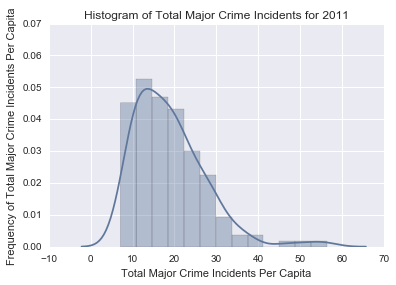

In [32]:
%matplotlib inline
x = c_norm['TMCI']
y = c2_norm['TMCI2']
#plt.hist(x)
sns.distplot(x)
plt.xlabel('Total Major Crime Incidents Per Capita')
plt.ylabel('Frequency of Total Major Crime Incidents Per Capita')
plt.title('Histogram of Total Major Crime Incidents for 2011')
plt.xticks(np.arange(-10, 80, 10))
plt.yticks(np.arange(0.00,0.07,0.01))

([<matplotlib.axis.YTick at 0x112a947d0>,
 <a list of 8 Text yticklabel objects>)

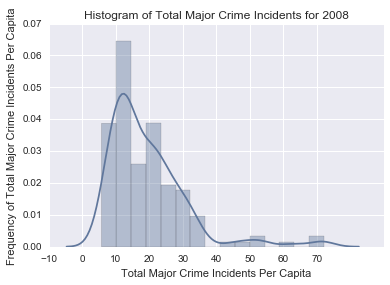

In [33]:
y = c2_norm['TMCI2']
sns.distplot(y)
plt.xlabel('Total Major Crime Incidents Per Capita')
plt.ylabel('Frequency of Total Major Crime Incidents Per Capita')
plt.title('Histogram of Total Major Crime Incidents for 2008')
plt.xticks(np.arange(-10, 80, 10))
plt.yticks(np.arange(0.00,0.07,0.01))

**An easier way to compare both years is to show the total crimes as bivariate distributions in a scatter plot. This also shows how correlated both distributions are. The more correlated they are, the lesser the difference in total crimes between the two years. Here, 2011 total crime data is on the x-axis and 2008 total crime data is on the y-axis.**

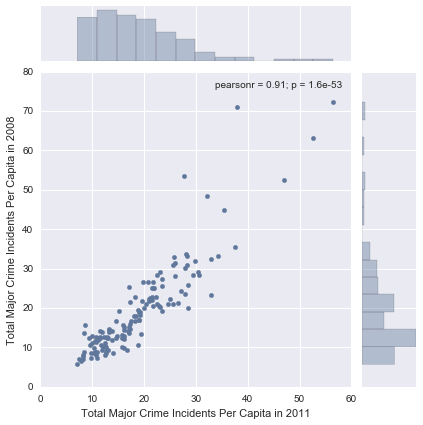

In [34]:
graph = (sns.jointplot(x=c_norm['TMCI'],y=c2_norm['TMCI2'])
         .set_axis_labels('Total Major Crime Incidents Per Capita in 2011', 'Total Major Crime Incidents Per Capita in 2008'))

**As expected, we see a strong correlation of 0.91 for both the years.**
**We also notice two interesting points in the plot which do not fall close to the general trend (an imaginary least squared regression line). They are not quite outliers either. These are neighbourhoods where 45 < TMCI2 < 55 and 25 < TMCI < 35. Let's find out what these neighbourhoods are. 

In [35]:
#c2_norm[['TMCI2']](c2_norm['TMCI2'] > 45) & (c2_norm['TMCI2'] < 55)
c2_norm[['N', 'TMCI2']][(c2_norm['TMCI2'] > 45) & (c2_norm['TMCI2'] < 55)]

,N,TMCI2
65,Danforth,53.577982
76,Waterfront Communities-The Island,48.453410
77,Kensington-Chinatown,52.486834


In [36]:
c_norm[['N','TMCI']][(c_norm['TMCI'] > 25) & (c_norm['TMCI'] < 35)]

,N,TMCI
0,West Humber-Clairville,32.815249
17,New Toronto,29.436039
22,Pelmo Park-Humberlea,25.502585
23,Black Creek,25.929284
25,Downsview-Roding-CFB,28.311688
26,York University Heights,27.999278
64,Greenwood-Coxwell,27.850799
65,Danforth,27.724868
67,North Riverdale,32.964330
68,Blake-Jones,28.461043


**We see that the two neighbourhoods falling outside the general trend are #65, Danforth, and #76, Waterfront Communities. We have already discussed how Danforth, despite being a crime prone neighbourhood had a drop in 2011. Likewise, Waterfront Communities seems to have a drop in crime, although the reasons are unclear.**

**We could also plot the total major crimes for both years as box plots.**

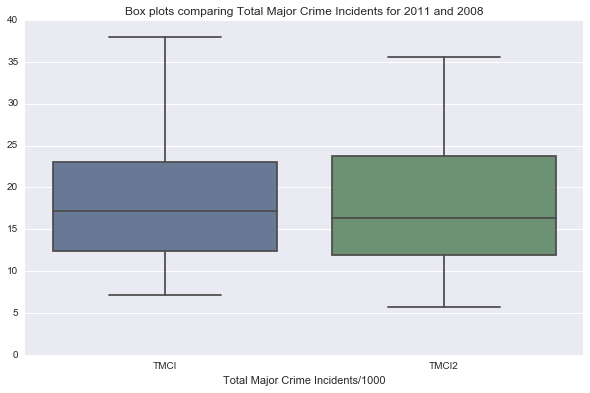

In [37]:
# First let's create a new dataframe with just the Total crime data for both years.
c_new = c_norm.loc[:,['TMCI']]
c_new.loc[:,'TMCI2'] = c2_norm.loc[:,['TMCI2']]

# Now show a box plot comparing both years
plt.figure(figsize=(10,6)) # This allows us to set the width and height of the box plot
plt.ylim(0,40) # This allows us to limit the range of the y-axis. This is helpful because we have a lot of outliers.
plt.xlabel('Total Major Crime Incidents/1000')
plt.title('Box plots comparing Total Major Crime Incidents for 2011 and 2008')
sns.boxplot(data=c_new)

**The box plots looks approximately the same. 2008 has a slightly lower median.**
**We can also use a violin plot instead of a box plot**

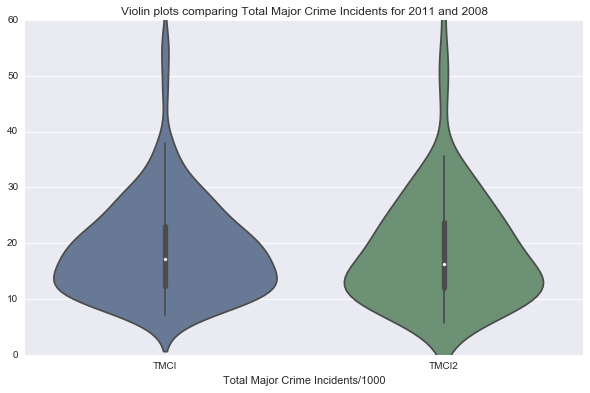

In [38]:
# Now show a violinplot comparing both years
plt.figure(figsize=(10,6)) # This allows us to set the width and height of the box plot
plt.ylim(0,60) # This allows us to limit the range of the y-axis. This is helpful because we have a lot of outliers.
plt.xlabel('Total Major Crime Incidents/1000')
plt.title('Violin plots comparing Total Major Crime Incidents for 2011 and 2008')
sns.violinplot(data=c_new)

**Violin plots can show more information than box plots when the data has a bimodal distribution. In this case, we don't see that. So, the violin plots do not reveal anything beyond what the box plots already show.**

**What is the neighbourhood with the most change in total major crimes from 2008 to 2011?**

In [39]:
# Calculate the difference in total major crimes between 2008 and 2011 as a percentage rate of increase or decrease, and store it as a column
# A positive value indicates that the number of major crimes have increased per capita from 2008 to 2011.
# A negative value indicates that the number of major crimes have decreased per capitat from 2008 to 2011.
c_norm.loc[:,'TCDiff'] = ((c_new['TMCI'] - c_new['TMCI2'])/c_new['TMCI2'])*100

In [40]:
# What are the top five neighbourhoods with maximum percent increase in total major crimes?
t5TCDiff = c_norm.sort_values(['TCDiff']).tail(5)
t5TCDiff[['N','TCDiff']]

,N,TCDiff
133,Highland Creek,57.341559
38,Bedford Park-Nortown,63.680435
9,Princess-Rosethorn,65.275058
134,Morningside,76.682444
49,Newtonbrook East,79.724978


In [41]:
# What are the top five neighbourhoods with maximum decrease in total major crimes?
b5TCDiff = c_norm.sort_values(['TCDiff']).head(5)
b5TCDiff[['N','TCDiff']]

,N,TCDiff
65,Danforth,-48.253243
78,University,-46.577419
95,Casa Loma,-44.713227
100,Forest Hill South,-38.321479
76,Waterfront Communities-The Island,-33.703986


**How do these neighbourhoods with most increase and decrease in total major crime compare against some of the top and bottom crime neighbourhoods for 2011?**

**Well, we've already seen that Danforth, generally a high crime-prone neighbourhood, had a decrease in crime in 2011, as reflected in the 48.5% decrease from 2008 to 2011. We also noticed the decrease in crime for Waterfront Communities in the bivariate scatter plot earlier. The data reveals a 33.7% decrease from 2008.**

**What is the difference in these neighbourhoods as regards median household income and education? Which is the most prominent age group of people? Does this in any way affect crime?**

In [42]:
# Let's examine the 2011 demographics data again
d.columns
#d.head()

Index([u'N', u'NId', u'Total Area', u'TPop', u'Pop - Males', u'Pop - Females',
       u'Pop 0 - 4 years', u'Pop 5 - 9 years', u'Pop 10 - 14 years',
       u'Pop 15 -19 years', u'Pop 20 - 24 years', u'Pop  25 - 29 years',
       u'Pop 30 - 34 years', u'Pop 35 - 39 years', u'Pop 40 - 44 years',
       u'Pop 45 - 49 years', u'Pop 50 - 54 years', u'Pop 55 - 59 years',
       u'Pop 60 - 64 years', u'Pop 65 - 69 years', u'Pop 70 - 74 years',
       u'Pop 75 - 79 years', u'Pop 80 - 84 years', u'Pop 85 years and over',
       u'Seniors 55 and over', u'Seniors 65 and over', u'Child 0-14',
       u'Youth 15-24', u'Home Language Category', u'   Language - Chinese',
       u'   Language - Italian', u'   Language - Korean',
       u'   Language - Persian (Farsi)', u'   Language - Portuguese',
       u'   Language - Russian', u'   Language - Spanish',
       u'   Language - Tagalog', u'   Language - Tamil',
       u'   Language - Urdu'],
      dtype='object')

**We can focus only on four different age groups - Children 0-14, Youth 15-24, Adults 25-54, and Seniors 55 and over. Most of these categories are already available as columns in the 2011 dataset, except Adults 25-54. We can compute this by subtracting the sum of the remaining three age groups from the total population for each neighbourhood.**

In [43]:
# 2011
# First we rename the column titles we are interested in to simpler ones
d.rename(columns={'Pop - Males':'PM','Pop - Females':'PF',
       'Seniors 55 and over':'S', 'Child 0-14':'C','Youth 15-24':'Y'}, inplace=True)

# Calculate the Adult age group - 25-54 years
d['A'] = d['TPop'] - d['C'] - d['Y'] - d['S']

# Now select only the columns of interest as a new dataframe
d_pop = d[['N','NId','TPop','PM','PF','C','Y','A','S']]

# To make these numbers more readable, we can convert them into percentages of the total population
d_pop.iloc[:,3:] = d_pop.iloc[:,3:].div(d['TPop'], axis=0) * 100

d_pop.tail()

/Users/smartlab/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,N,NId,TPop,PM,PF,C,Y,A,S
135,West Hill,136,26550,47.306968,52.730697,18.644068,14.802260,40.470810,26.082863
136,Woburn,137,53350,48.744142,51.227741,19.297095,14.217432,42.764761,23.720712
137,Eglinton East,138,22830,46.342532,53.613666,19.864214,13.491021,41.699518,24.945247
138,Scarborough Village,139,16615,47.095998,52.904002,20.975023,14.715618,40.926873,23.382486
139,Guildwood,140,9815,46.357616,53.693327,13.092206,10.952624,36.016302,39.938869


In [44]:
# Now let's examine the 2008 demographics data again
d2.columns

Index([u'N', u'NId', u'Total Area', u'TPop2', u'Pop - Males', u'Pop - Females',
       u'Pop 0 - 4 years', u'Pop 5 - 9 years', u'Pop 10 - 14 years',
       u'Pop 15 -19 years', u'Pop 20 - 24 years', u'Pop  25 - 29 years',
       u'Pop 30 - 34 years', u'Pop 35 - 39 years', u'Pop 40 - 44 years',
       u'Pop 45 - 49 years', u'Pop 50 - 54 years', u'Pop 55 - 59 years',
       u'Pop 60 - 64 years', u'Pop 65 - 69 years', u'Pop 70 - 74 years',
       u'Pop 75 - 79 years', u'Pop 80 - 84 years', u'Pop 85 years and over',
       u'Pop 6-12 years', u'Visible Minority Category', u'   Chinese',
       u'   South Asian', u'   Black', u'   Filipino', u'   Latin American',
       u'   Southeast Asian', u'   Arab', u'   West Asian', u'   Korean',
       u'   Japanese', u'   Other Visible Minority',
       u'   Multiple Visible Minority', u'   Not a Visible Minority',
       u'Aboriginal', u'Home Language Category', u'   Language - Chinese',
       u'   Language - Italian', u'   Language - Korean',
    

**We will again focus only on the four different age groups - Children 0-14, Youth 15-24, Adults 25-54, and Seniors 55 and over. Unlike the 2011 dataset, none of these categories are available as columns in the 2008 dataset. So, we need to compute values for each of these age groups.**

In [45]:
# 2008
# First we rename the column titles we are interested in to simpler ones
d2.rename(columns={'Pop - Males':'PM2','Pop - Females':'PF2',
        'Pop 0 - 4 years':'Pop4','Pop 5 - 9 years':'Pop9','Pop 10 - 14 years':'Pop14',
        'Pop 15 -19 years':'Pop19','Pop 20 - 24 years':'Pop24','Pop  25 - 29 years':'Pop29',
        'Pop 30 - 34 years':'Pop34','Pop 35 - 39 years':'Pop39','Pop 40 - 44 years':'Pop44',
        'Pop 45 - 49 years':'Pop49','Pop 50 - 54 years':'Pop54','Pop 55 - 59 years':'Pop59',
        'Pop 60 - 64 years':'Pop64','Pop 65 - 69 years':'Pop69','Pop 70 - 74 years':'Pop74',
        'Pop 75 - 79 years':'Pop79','Pop 80 - 84 years':'Pop84','Pop 85 years and over':'Pop85plus',
        'Pop 6-12 years':'Pop12'}, inplace=True)

# Calculate the Child age group - 0-14 years
d2['C2'] = d2['Pop4'] + d2['Pop9'] + d2['Pop14']

# Calculate the Youth age group - 15-24 years
d2['Y2'] = d2['Pop19'] + d2['Pop24']

# Calculate the Adult age group - 25-54 years
d2['A2'] = d2['Pop29'] + d2['Pop34'] + d2['Pop39'] + d2['Pop44'] + d2['Pop49'] + d2['Pop54']

# Calculate the Senior age group - 55 years and over
d2['S2'] = d2['Pop59'] + d2['Pop64'] + d2['Pop69'] + d2['Pop74'] + d2['Pop79'] + d2['Pop84'] + d2['Pop85plus']

# Now select only the columns of interest as a new dataframe
d2_pop = d2[['N','NId','TPop2','PM2','PF2','C2','Y2','A2','S2']]

# To make these numbers more readable, we can convert them into percentages of the total population
d2_pop.iloc[:,3:] = d2_pop.iloc[:,3:].div(d2['TPop2'], axis=0) * 100

d2_pop.tail()

,N,NId,TPop2,PM2,PF2,C2,Y2,A2,S2
135,West Hill,136,25635,47.025551,52.974449,19.797152,14.238346,41.544763,24.244197
136,Woburn,137,40845,62.565798,65.870976,21.153140,12.841229,42.098176,23.821765
137,Eglinton East,138,22385,46.593701,53.428635,21.353585,13.602859,42.841188,22.224704
138,Scarborough Village,139,15585,47.449471,52.550529,22.264998,14.084055,40.968880,22.842477
139,Guildwood,140,10025,46.234414,53.715711,14.862843,11.172070,38.004988,36.259352


In [46]:
d_pop.describe()

,NId,TPop,PM,PF,C,Y,A,S
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,70.5000,18676.928571,47.995935,52.007599,15.384803,12.555489,45.626679,26.433030
std,40.5586,9099.209342,1.858778,1.864009,3.973753,2.217762,6.164306,5.025376
min,1.0000,6490.000000,43.817935,41.998774,3.951314,7.936508,35.111876,11.690476
25%,35.7500,11851.250000,47.035876,51.225684,13.477805,11.048094,41.540268,22.887457
50%,70.5000,16367.500000,47.875122,52.133528,15.579593,12.557856,44.592305,26.083759
75%,105.2500,22410.000000,48.757292,52.931699,17.644643,13.735591,48.754834,29.548738
max,140.0000,53350.000000,58.001226,56.227355,26.371912,21.437741,73.333333,39.938869


In [47]:
d2_pop.describe()

,NId,TPop2,PM2,PF2,C2,Y2,A2,S2
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,70.5000,17867.892857,48.238404,51.968464,16.216353,12.532484,46.520324,24.733166
std,40.5586,8206.117894,4.515968,4.573401,4.148286,1.981066,5.854613,4.895388
min,1.0000,5450.000000,28.774731,30.961472,4.452195,7.747106,33.495737,10.784786
25%,35.7500,11767.500000,47.025387,51.057498,14.202400,11.186489,42.538947,21.329397
50%,70.5000,15345.000000,47.975736,52.017023,16.063944,12.356507,45.551311,24.112458
75%,105.2500,21776.250000,48.916054,52.997096,18.827465,13.978225,49.879662,27.671581
max,140.0000,45865.000000,86.422018,89.266055,27.876745,18.543607,69.948542,38.476562


**Summary statistics show that the Adults group is the most prominent group among the four age groups in each neighbourhood.**

**1. Look at how to get median household income for both 2011 and 2008.**

**Although we have income data available for 2008, we do not have that for 2011 in the demographics datasets. So, an alternative is to use Economics datasets available from the Open Data portal for 2008 and 2011. While these datasets do not contain income data, they have other important variables such as number of people employed, and number of people on social assistance, which we could use.**

In [48]:
# Read in the data for both years
e = pd.read_csv('TorontoEconomics2011.csv')
e2 = pd.read_csv('TorontoEconomics2008.csv')

In [49]:
e.tail() # Take a look at the 2011 economics data

,Neighbourhood,Neighbourhood Id,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Social Assistance Recipients
135,West Hill,136,424,153,706,308229,4500,4974
136,Woburn,137,1073,214,723,316584,16190,6747
137,Eglinton East,138,296,143,705,274020,2351,4171
138,Scarborough Village,139,228,217,699,356096,1851,4133
139,Guildwood,140,67,171,774,444309,924,309


In [50]:
e2.tail() # Take a look at the 2008 economics data

,Neighbourhood,Neighbourhood Id,Access to Child Care,Business Licensing,Businesses,Child Care Spaces,Inequality (Gini coeff.),Local Employment,Social Assistance Recipients
135,West Hill,136,0.490647,225,439,134.00000,0.435829,4551,4448
136,Woburn,137,0.214933,333,1020,210.00000,0.414480,14374,6647
137,Eglinton East,138,0.268571,130,313,153.00000,0.399830,2440,4405
138,Scarborough Village,139,0.350667,127,220,220.00000,0.432119,1926,3981
139,Guildwood,140,41.000000,66,145,0.34834,792.000000,300,NaN


**We are only looking at the Business, Local Employment, and Social Assistance Recipients columns from both years**

In [51]:
# Rename columns in both years to simpler ones
#2011
e.rename(columns={'Neighbourhood':'N','Neighbourhood Id':'NId','Businesses':'Bus',
                 'Local Employment':'Emp','Social Assistance Recipients':'SAR'},inplace=True)
#2008
e2.rename(columns={'Neighbourhood':'N','Neighbourhood Id':'NId','Businesses':'Bus2',
                 'Local Employment':'Emp2','Social Assistance Recipients':'SAR2'},inplace=True)

# Select only the columns we are interested in from both years
e_sel = e[['N','NId','Bus','Emp','SAR']] #2011
e2_sel = e2[['N','NId','Bus2','Emp2','SAR2']] #2008

# Now convert the employment and social assistance recipients into percentages of total population.
# Also convert number of businesses into businesses per 100 people
e_sel.iloc[:,2:] = e_sel.iloc[:,2:].div(d['TPop'], axis=0) * 100

e2_sel.iloc[:,2:] = e2_sel.iloc[:,2:].div(d2['TPop2'], axis=0) * 100


In [52]:
e_sel.tail()
#e2_sel.tail()

,N,NId,Bus,Emp,SAR
135,West Hill,136,1.596987,16.949153,18.734463
136,Woburn,137,2.011246,30.346767,12.646673
137,Eglinton East,138,1.296540,10.297854,18.269820
138,Scarborough Village,139,1.372254,11.140536,24.875113
139,Guildwood,140,0.682629,9.414162,3.148242


In [53]:
e2_sel = e2_sel.fillna(e2_sel.mean())

**2. Combine all features of each year along with TMCI into one dataframe**

In [54]:
# 2011
merge2011 = pd.concat([d_pop, e_sel[['Bus','Emp','SAR']]], axis = 1) # Concatenate population and economics data.
merge2011['TMCI'] = c_norm['TMCI'] # Include the total major crimes per 1000 people
#del merge2011['TPop'] # We can remove the total population data as we don't need it.

# Same thing with 2008
merge2008 = pd.concat([d2_pop, e2_sel[['Bus2','Emp2','SAR2']]], axis = 1) # Concatenate population and economics data
merge2008['TMCI2'] = c2_norm['TMCI2'] # Include the total major crimes per 1000 people
#del merge2008['TPop2']

In [55]:
merge2011.tail()

,N,NId,TPop,PM,PF,C,Y,A,S,Bus,Emp,SAR,TMCI
135,West Hill,136,26550,47.306968,52.730697,18.644068,14.802260,40.470810,26.082863,1.596987,16.949153,18.734463,28.210923
136,Woburn,137,53350,48.744142,51.227741,19.297095,14.217432,42.764761,23.720712,2.011246,30.346767,12.646673,15.145267
137,Eglinton East,138,22830,46.342532,53.613666,19.864214,13.491021,41.699518,24.945247,1.296540,10.297854,18.269820,21.550591
138,Scarborough Village,139,16615,47.095998,52.904002,20.975023,14.715618,40.926873,23.382486,1.372254,11.140536,24.875113,28.528438
139,Guildwood,140,9815,46.357616,53.693327,13.092206,10.952624,36.016302,39.938869,0.682629,9.414162,3.148242,11.512990


In [56]:
# Normalize all features
#cols_norm = ['TPop','PM','PF','C','Y','A','S','Bus','Emp','SAR','TMCI']
#merge2011[cols_norm] = merge2011[cols_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
#cols_norm2 = ['TPop2','PM2','PF2','C2','Y2','A2','S2','Bus2','Emp2','SAR2','TMCI2']
#merge2008[cols_norm2] = merge2008[cols_norm2].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [57]:
merge2008.tail()

,N,NId,TPop2,PM2,PF2,C2,Y2,A2,S2,Bus2,Emp2,SAR2,TMCI2
135,West Hill,136,25635,47.025551,52.974449,19.797152,14.238346,41.544763,24.244197,1.712502,17.753072,17.351278,30.895260
136,Woburn,137,40845,62.565798,65.870976,21.153140,12.841229,42.098176,23.821765,2.497246,35.191578,16.273718,19.316930
137,Eglinton East,138,22385,46.593701,53.428635,21.353585,13.602859,42.841188,22.224704,1.398258,10.900156,19.678356,22.827786
138,Scarborough Village,139,15585,47.449471,52.550529,22.264998,14.084055,40.968880,22.842477,1.411614,12.358037,25.543792,25.794033
139,Guildwood,140,10025,46.234414,53.715711,14.862843,11.172070,38.004988,36.259352,1.446384,2.992519,9.640437,12.568579


**3. Do diagonal correlation of these features to ensure they don't correlate with each other. This also computes pairwaise correlations with TMCI to see if there is a relationship**

In [58]:
corrmat2011 = merge2011.iloc[:,3:]
corr2011 = corrmat2011.corr()

# First we take a look at the correlation table for 2011
corr2011

,PM,PF,C,Y,A,S,Bus,Emp,SAR,TMCI
PM,1.000000,-0.999708,-0.262159,0.105218,0.485240,-0.434347,0.206219,0.107014,0.218235,0.504714
PF,-0.999708,1.000000,0.259095,-0.106597,-0.483859,0.435686,-0.207220,-0.107741,-0.219820,-0.505878
C,-0.262159,0.259095,1.000000,0.101991,-0.545515,-0.166599,-0.380420,-0.321718,0.456916,-0.150601
Y,0.105218,-0.106597,0.101991,1.000000,-0.311823,-0.139468,0.263345,0.345554,0.236682,0.294891
A,0.485240,-0.483859,-0.545515,-0.311823,1.000000,-0.657665,0.327817,0.240374,0.011142,0.396014
S,-0.434347,0.435686,-0.166599,-0.139468,-0.657665,1.000000,-0.217517,-0.192954,-0.479418,-0.496818
Bus,0.206219,-0.207220,-0.380420,0.263345,0.327817,-0.217517,1.000000,0.860655,-0.102634,0.563295
Emp,0.107014,-0.107741,-0.321718,0.345554,0.240374,-0.192954,0.860655,1.000000,-0.120620,0.475120
SAR,0.218235,-0.219820,0.456916,0.236682,0.011142,-0.479418,-0.102634,-0.120620,1.000000,0.463434
TMCI,0.504714,-0.505878,-0.150601,0.294891,0.396014,-0.496818,0.563295,0.475120,0.463434,1.000000


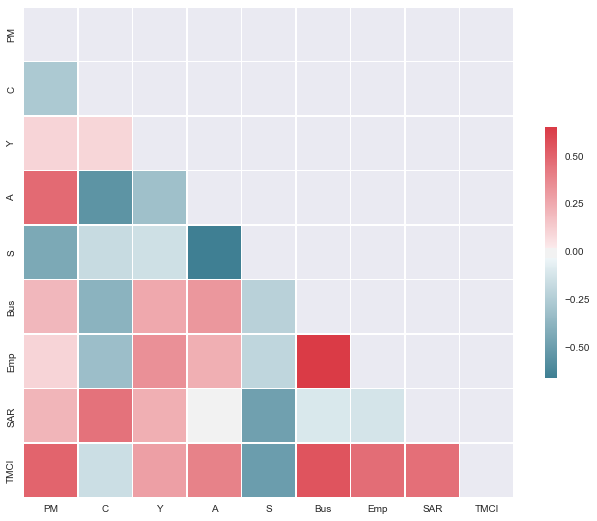

In [59]:
# Drop PF because of very high correlation
corrmat2011 = corrmat2011.drop('PF',1)
corr2011 = corrmat2011.corr()

# An easier way is to visualize the feature correlations
# Generate a mask for the upper triangle
mask = np.zeros_like(corr2011, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr2011, mask=mask, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

**Here are some key takeaways.** 

There is a strong positive correlation between the number of people employed and the number of businesses in that neighbourhood, suggesting that one of these features could be removed when using them for prediction purposes.

There is also a very strong negative correlation between the percentage of female population and the percentage of male population in that neighbourhood (TMCI). 

There is a moderate to high positive correlation between the number of males and TMCI, number of adults and TMCI, number of employed people and TMCI, and number of people on social assistance and TMCI. As might be expected, there is a negative correlation between the number of seniors and TMCI.

In [60]:
# Now, let's look at 2008
corrmat2008 = merge2008.iloc[:,3:]
corr2008 = corrmat2008.corr()

# First we take a look at the correlation table for 2008
corr2008

,PM2,PF2,C2,Y2,A2,S2,Bus2,Emp2,SAR2,TMCI2
PM2,1.000000,0.629499,-0.088499,0.007301,0.196905,-0.162688,0.212224,0.072305,0.134476,0.412011
PF2,0.629499,1.000000,0.096254,-0.099926,-0.176978,0.173348,0.043809,-0.029058,-0.038105,-0.015050
C2,-0.088499,0.096254,1.000000,0.175526,-0.545894,-0.264382,-0.402654,-0.324367,0.496280,-0.211898
Y2,0.007301,-0.099926,0.175526,1.000000,-0.340884,-0.146744,0.107260,0.171481,0.171874,0.146219
A2,0.196905,-0.176978,-0.545894,-0.340884,1.000000,-0.597055,0.390237,0.285942,-0.019473,0.432165
S2,-0.162688,0.173348,-0.264382,-0.146744,-0.597055,1.000000,-0.169916,-0.135863,-0.466623,-0.397451
Bus2,0.212224,0.043809,-0.402654,0.107260,0.390237,-0.169916,1.000000,0.885773,-0.096853,0.635169
Emp2,0.072305,-0.029058,-0.324367,0.171481,0.285942,-0.135863,0.885773,1.000000,-0.117931,0.499110
SAR2,0.134476,-0.038105,0.496280,0.171874,-0.019473,-0.466623,-0.096853,-0.117931,1.000000,0.399231
TMCI2,0.412011,-0.015050,-0.211898,0.146219,0.432165,-0.397451,0.635169,0.499110,0.399231,1.000000


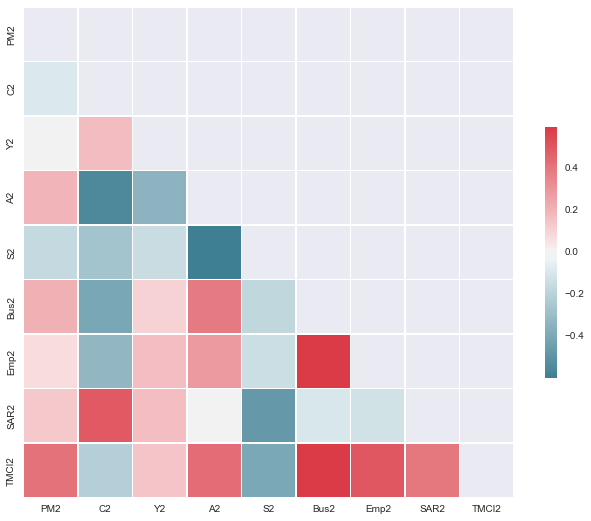

In [61]:
# Drop PF2 because of very high correlation
corrmat2008 = corrmat2008.drop('PF2',1)
corr2008 = corrmat2008.corr()

# Now let's visualize the correlations for 2008
# Generate a mask for the upper triangle
mask = np.zeros_like(corr2008, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr2008, mask=mask, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Interestingly, there is a moderate positive correlation between the percentage of females and percentage of males, for the 2008 dataset, which means that the percentage of females has changed in 2011 in comparison to males.

We again see the same strong correlation between number of people employed and the number of businesses in that neighbourhood, again suggesting that one of these features can be removed for prediction purposes.

**4. Now compute only percentage increases and decreases between 2008 and 2011 for all features including TMCI**

In [62]:
# Compute only percentage increases and decreases between 2008 and 2011 for all features including TMCI
# A positive value indicates an increase from 2008 to 2011.
# A negative value indicates a decrease from 2008 to 2011.
#merge_diff = merge2011 # Create a new dataframe
merge_diff = merge2011.copy()
merge_diff.loc[:,'PM'] = ((merge2011['PM'] - merge2008['PM2'])/merge2008['PM2']) * 100
merge_diff.loc[:,'PF'] = ((merge2011['PF'] - merge2008['PF2'])/merge2008['PF2']) * 100
merge_diff.loc[:,'C'] = ((merge2011['C'] - merge2008['C2'])/merge2008['C2']) * 100
merge_diff.loc[:,'Y'] = ((merge2011['Y'] - merge2008['Y2'])/merge2008['Y2']) * 100
merge_diff.loc[:,'A'] = ((merge2011['A'] - merge2008['A2'])/merge2008['A2']) * 100
merge_diff.loc[:,'S'] = ((merge2011['S'] - merge2008['S2'])/merge2008['S2']) * 100
merge_diff.loc[:,'Bus'] = ((merge2011['Bus'] - merge2008['Bus2'])/merge2008['Bus2']) * 100
merge_diff.loc[:,'Emp'] = ((merge2011['Emp'] - merge2008['Emp2'])/merge2008['Emp2']) * 100
merge_diff.loc[:,'SAR'] = ((merge2011['SAR'] - merge2008['SAR2'])/merge2008['SAR2']) * 100
merge_diff.loc[:,'TMCI'] = ((merge2011['TMCI'] - merge2008['TMCI2'])/merge2008['TMCI2']) * 100

In [63]:
merge_diff.tail()

,N,NId,TPop,PM,PF,C,Y,A,S,Bus,Emp,SAR,TMCI
135,West Hill,136,26550,0.598434,-0.460132,-5.824497,3.960529,-2.585051,7.583939,-6.745428,-4.528340,7.971665,-8.688509
136,Woburn,137,53350,-22.091391,-22.230177,-8.774325,10.717066,1.583406,-0.424204,-19.461409,-13.766962,-22.287746,-21.595889
137,Eglinton East,138,22830,-0.539063,0.346314,-6.974807,-0.822169,-2.664889,12.241078,-7.274633,-5.525633,-7.157791,-5.594915
138,Scarborough Village,139,16615,-0.744946,0.672635,-5.793739,4.484243,-0.102534,2.364056,-2.788280,-9.851896,-2.617776,10.600923
139,Guildwood,140,9815,0.266472,-0.041672,-11.913179,-1.964240,-5.232697,10.147775,-52.804469,214.589913,-67.343363,-8.398629


**5. Use all the percentage difference features in a linear regression to predict increase or decrease in crime as a percentage in comparison with 2008. Use linear regression as an ML model**

In [64]:
# We will remove the percentage of females as the percentage of males is correlated with TMCI for both 2008 and 2011
# and is a better predictor. 
# Let's leave the remaining features as is and use them for prediction using linear regression.
merge_forreg = merge_diff[['PM','C','Y','A','S','Bus','Emp','SAR','TMCI']]

# Let's define our independent and dependent variables for regression
X = merge_forreg.iloc[:,0:8].values
Y = merge_forreg['TMCI'].values

**Let's recall what we are predicting here using machine learning. Using all the features that show percentages of increase or decrease from 2008 to 2011, we want to predict the percentage of increase or decrease in major crimes within each neighbourhood**

In [65]:
# Before we train the model, we need to make sure we can test it with unseen data to validate the model for generalizability. 
# There are different ways of doing train-test splits. 
# Let's use a random 70:30 split for training:testing

import sklearn
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(
    X, Y, test_size=0.30, random_state = 5)
print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

(98, 8)
(42, 8)
(98,)
(42,)


In [66]:
# Create an instance of the linear regression model.
lm = LinearRegression()

# Now, train the model with all the 8 predictors only using the training set
lm.fit(X_train, Y_train)

# First, we can check to see how much of the variance in the training data is captured by the model.
# We can compute R-squared for this.
from sklearn.metrics import r2_score
print "R-squared: "
print r2_score(Y_train, lm.predict(X_train)) 
print

# Predict the output on the test set and print the first five values
print "Total crime increase/decrease percentage predictions for 5 five neighbourhoods in the test set:"
print lm.predict(X_test)[0:5]
print

# Look at the mean squared error on the test set first and then on the training set.
from sklearn.metrics import mean_squared_error
print "Mean squared error on the test set: "
print mean_squared_error(Y_test, lm.predict(X_test))
print "Mean squared error on the training set: "
print mean_squared_error(Y_train, lm.predict(X_train))

R-squared: 
0.272947014798

Total crime increase/decrease percentage predictions for 5 five neighbourhoods in the test set:
[ 0.43404765  2.78757374  8.21302575  6.44711317  6.92137319]

Mean squared error on the test set: 
439.045207314
Mean squared error on the training set: 
404.948232772


**We notice that the linear regression model explains only 27.3% of the variance in the model. So, this indicates that the model is not a flexible one. We have to keep in mind that we are not using features (i.e., # of businesses, people employed, percentage of males, percentage of adults etc.) to predict crime rates. Instead, we are using percentage changes of these attributes (between 2008 and 2011) as features for predicting percentage change in crime. So, some of the linear relationships between the features and the dependent variable may be lost.**

**This is also quite clear from the extremely high MSE values not just for the test set but also for the training set.**

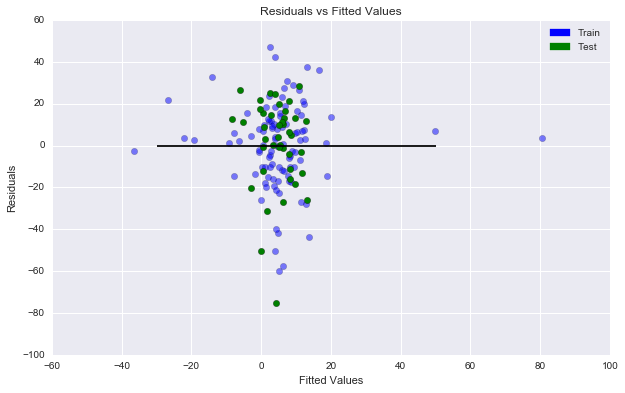

In [67]:
import matplotlib.patches as mpatches

plt.figure(figsize=(10,6))
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=-30, xmax = 50)
#plt.title('Residual Plot using training (blue) and test (green) data')
plt.title('Residuals vs Fitted Values')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')

blue_patch = mpatches.Patch(color='b', label='Train')
green_patch = mpatches.Patch(color ='g', label='Test')
plt.legend(handles=[blue_patch, green_patch])

**The residual plot clearly does not show homoscedasticity.**

**We need a more flexible/powerful model.** 

**Let's use random forests.**

In [68]:
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the Random Forest model.
rf = RandomForestRegressor(random_state = 1)

# Now, train the model with all the 8 predictors only using the training set
rf.fit(X_train, Y_train)
#rf.predict(X_train)

# First, we can check to see how much of the variance in the training data is captured by the model.
# We can compute R-squared for this (also referred to as the coefficient of determination).
print "R-squared for training data: "
print rf.score(X_train,Y_train) 
print
print "R-squared for test data: "
print rf.score(X_test,Y_test) 
print

# Predict the output on the test set and print the first five values
print "Total crime increase/decrease percentage predictions for 5 five neighbourhoods in the test set:"
print rf.predict(X_test)[0:5]
print

# Look at the mean squared error on the test set first and then on the training set.
from sklearn.metrics import mean_squared_error
print "Mean squared error on the test set: "
print mean_squared_error(Y_test, rf.predict(X_test))
print "Mean squared error on the training set: "
print mean_squared_error(Y_train, rf.predict(X_train))

R-squared for training data: 
0.851056671712

R-squared for test data: 
0.0923972904706

Total crime increase/decrease percentage predictions for 5 five neighbourhoods in the test set:
[ 0.74107366 -4.94824578  3.52266184  2.46348065  0.83022161]

Mean squared error on the test set: 
437.883925485
Mean squared error on the training set: 
82.9572793196


**We notice that the random forest regression model explains 85.1% of the variance in the training data, which is a big improvement over the linear regression model. However, it performs poorly with the test data.**

**This is also quite clear from the improvement in the MSE value for just the training set: 404.9 with linear regression to 83 with random forest. But we still notice the high MSE value for the test set.**

**The model may be too overfitted with the training data. So, we can mitigate some overfitting using cross-validation.**

In [69]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 1)

# import KFold from sklearn
from sklearn.cross_validation import KFold

# Split the dataset into 5 folds using the iterator
kf = KFold(len(X), n_folds=5)

# Now use the iterator to get indices of all 5 folds
# Initialize mse_test
mse_test = 0
for train_indices, test_indices in kf:
    #print('Train: %s | test: %s' % (train_indices, test_indices))
    # Fit a random forest model with all 8 predictors to the training set
    rf.fit(X[train_indices], Y[train_indices])
    results = rf.predict(X[test_indices])
    # Find the mean squared error of each split (test fold) and add it to the previous one
    mse_test = mse_test + mean_squared_error(Y[test_indices], rf.predict(X[test_indices]))
    
print "Average mean squared error across all 5 folds is: "
print mse_test/5

Average mean squared error across all 5 folds is: 
571.601880054


**Our results show that cross-validation does not help in reducing overall MSE. This indicates that there is something missing in the data with respect to salient features. We could not use income data, which might have made a big difference, and allowed to track percentage increase and decrease in crime.**

**As an alternative, we can create a predictive model of major crimes for each year using the actual 8 features instead of their percentage differences between 2008 and 2011.**

In [70]:
# We will remove the percentage of females as the percentage of males is correlated with TMCI for both 2008 and 2011
# and is a better predictor. 
# Let's leave the remaining features as is and use them for prediction using linear regression.
forreg2011 = merge2011[['PM','C','Y','A','S','Bus','Emp','SAR','TMCI']]
forreg2008 = merge2008[['PM2','C2','Y2','A2','S2','Bus2','Emp2','SAR2','TMCI2']]

# Let's define our independent and dependent variables for regression
X2011 = forreg2011.iloc[:,0:8].values
Y2011 = forreg2011['TMCI'].values

X2008 = forreg2008.iloc[:,0:8].values
Y2008 = forreg2008['TMCI2'].values

**Let's recall what we are predicting here using machine learning. Using all the features, we want to predict the major crimes within each neighbourhood. We are creating two prediction models - one for 2011 and one for 2008**

In [71]:
# Again, we are using a random split of 70:30 for training vs. test
X2011_train, X2011_test, Y2011_train, Y2011_test = sklearn.cross_validation.train_test_split(
    X2011, Y2011, test_size=0.30, random_state = 5)
print X2011_train.shape
print X2011_test.shape
print Y2011_train.shape
print Y2011_test.shape

(98, 8)
(42, 8)
(98,)
(42,)


In [72]:
# Likewise, for the 2008 data
X2008_train, X2008_test, Y2008_train, Y2008_test = sklearn.cross_validation.train_test_split(
    X2008, Y2008, test_size=0.30, random_state = 5)
print X2008_train.shape
print X2008_test.shape
print Y2008_train.shape
print Y2008_test.shape

(98, 8)
(42, 8)
(98,)
(42,)


In [73]:
# Let's create two instances of the linear regression model.
lm2011 = LinearRegression()
lm2008 = LinearRegression()

# Now, train the model with all the 8 predictors only using the training set
lm2011.fit(X2011_train, Y2011_train)
lm2008.fit(X2008_train, Y2008_train)

# First, we can check to see how much of the variance in the training data is captured by the models.
# We can compute R-squared for this.
from sklearn.metrics import r2_score
print "R-squared for 2011 model training data: "
print r2_score(Y2011_train, lm2011.predict(X2011_train)) 
print
print "R-squared for 2008 model training data: "
print r2_score(Y2008_train, lm2008.predict(X2008_train)) 
print

# Predict the output on the test set and print the first five values
print "Total major crime per 1000 for 5 five neighbourhoods in the 2011 test set:"
print lm2011.predict(X2011_test)[0:5]
print
print "Total major crime per 1000 for 5 five neighbourhoods in the 2008 test set:"
print lm2008.predict(X2008_test)[0:5]
print

# Look at the mean squared error on the test set first and then on the training set.
from sklearn.metrics import mean_squared_error
print "Mean squared error on the test set for 2011: "
print mean_squared_error(Y2011_test, lm2011.predict(X2011_test))
print "Mean squared error on the training set for 2011: "
print mean_squared_error(Y2011_train, lm2011.predict(X2011_train))
print
print "Mean squared error on the test set for 2008: "
print mean_squared_error(Y2008_test, lm2008.predict(X2008_test))
print "Mean squared error on the training set for 2008: "
print mean_squared_error(Y2008_train, lm2008.predict(X2008_train))

print
print "Beta coefficients for 2011 LR model:"
print lm2011.coef_
print
print "Beta coefficients for 2008 LR model: "
print lm2008.coef_

R-squared for 2011 model training data: 
0.707429445364

R-squared for 2008 model training data: 
0.715766205168

Total major crime per 1000 for 5 five neighbourhoods in the 2011 test set:
[ 22.49129055  22.90672117   8.74006945  12.55049037  26.20295548]

Total major crime per 1000 for 5 five neighbourhoods in the 2008 test set:
[ 23.05906907  20.92184533   9.87536331  11.26654225  19.82301645]

Mean squared error on the test set for 2011: 
40.6697421551
Mean squared error on the training set for 2011: 
22.3433271651

Mean squared error on the test set for 2008: 
46.589053144
Mean squared error on the training set for 2008: 
40.8675396717

Beta coefficients for 2011 LR model:
[  1.55156066e+00  -3.45606289e-02   1.55499938e-03   6.07936821e-02
  -2.77880526e-02   1.60274704e+00   2.39258196e-02   6.92840089e-01]

Beta coefficients for 2008 LR model: 
[ 0.43381702  1.46699755  2.78186971  2.39200411  2.02195327  2.5184427
 -0.00746671  0.89644807]


**We notice that both models for years 2011 and 2008 explain variance (R-squared) in the training data about the same - 0.71 and 0.72 respectively for 2011 and 2008.**

**This difference is reflected in the MSE values for training and test data as well. We notice that the 2011 model has much bigger difference in MSE values between the training and test data, although it seems to be performing better than the 2008 model on the test data. So, with the features that we have used, we seem to have a superior predictive model for major crime for year 2011 rather than 2008. However, we cannot confirm this as it seems to be overfitted based on MSE values.**

**We can also look at the coefficients for each of the features to see how salient they are to the dependent variable, which is major crime. A visualization of their contributions can be shown as a measure of salience.**

In [95]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
#from statsmodels.formula.api import ols
import statsmodels.api as sm
Y2011std = stats.zscore(Y2011_train)
X2011std = stats.zscore(X2011_train)
m = sm.OLS(Y2011std,X2011std).fit()
print m.summary()
print
Y2008std = stats.zscore(Y2008_train)
X2008std = stats.zscore(X2008_train)
m2 = sm.OLS(Y2008std,X2008std).fit()
print m2.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     31.43
Date:                Wed, 02 Nov 2016   Prob (F-statistic):           1.03e-21
Time:                        07:14:43   Log-Likelihood:                -78.833
No. Observations:                  98   AIC:                             171.7
Df Residuals:                      91   BIC:                             189.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.3059      0.071      4.311      0.0

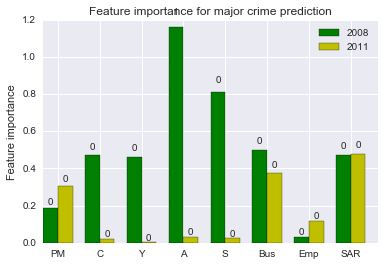

In [97]:
N = 8
LRSal2008 = lm2008.coef_
LRSal2008std = [0.1878,0.4699,0.4614,1.16,0.8131,0.4971,0.0319,0.4709]

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars


fig, ax = plt.subplots()
fig = plt.figure(figsize=(8,8))
#LRrects1 = ax.bar(ind, LRSal2008, width, color='g')
LRrects1 = ax.bar(ind, LRSal2008std, width, color='g',yerr=None)

LRSal2011 = lm2011.coef_
LRSal2011std = [0.3059,0.0215,0.0035,0.0333,0.0244,0.3768,0.1162,0.4798]
#LRrects2 = ax.bar(ind + width, LRSal2011, width, color='y')
LRrects2 = ax.bar(ind + width, LRSal2011std, width, color='y',yerr=None)

# add some text for labels, title and axes ticks

ax.set_ylabel('Feature importance')
ax.set_title('Feature importance for major crime prediction')
ax.set_xticks(ind + width)
ax.set_xticklabels(('PM', 'C', 'Y', 'A', 'S', 'Bus', 'Emp', 'SAR'))

ax.legend((LRrects1[0], LRrects2[0]), ('2008', '2011'))

def autolabel(LRrects):
    # attach some text labels
    for rect in LRrects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(LRrects1)
autolabel(LRrects2)

plt.show()

**For the 2008 linear regression model, the beta coefficient values suggest that almost all the features except number of people employed (i.e. all age groups, percentage of males, and number of social assistance recipients) are important predictors for major crime in a neighbourhood. However, for the 2011 linear regression model, only percentage of males, number of businesses, and number of social assistance recipients show up as important predictors of major crime. So, the models for both years are not consistent with each other.**

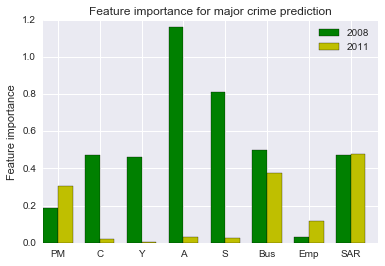

In [109]:
# Doing the same thing as above but (a) removing error bars
n = 8
fig, ax = plt.subplots()
bar_width = 0.35
bar_locations = np.arange(n)
LRrects1 = ax.bar(bar_locations, LRSal2008std, bar_width, color='g')
LRrects2 = ax.bar(bar_locations + bar_width, LRSal2011std, bar_width, color='y')
ax.set_ylabel('Feature importance')
ax.set_title('Feature importance for major crime prediction')
ax.set_xticks(ind + width)
ax.set_xticklabels(('PM', 'C', 'Y', 'A', 'S', 'Bus', 'Emp', 'SAR'))
ax.legend((LRrects1[0], LRrects2[0]), ('2008', '2011'))
plt.show()

**Let's look at the residual plots for both these models.**

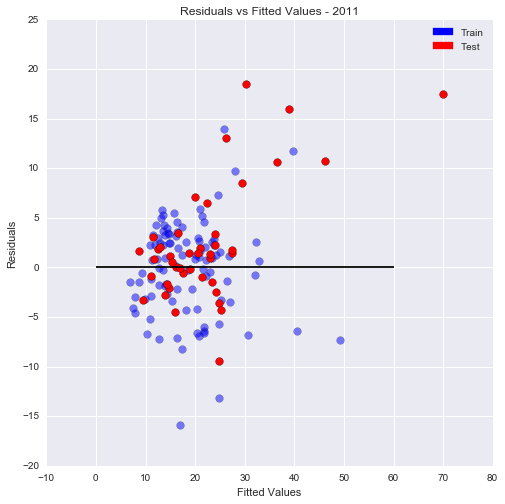

In [76]:
# 2011
plt.figure(figsize=(8,8))
plt.scatter(lm2011.predict(X2011_train), lm2011.predict(X2011_train) - Y2011_train, c='b', s=60, alpha=0.5)
plt.scatter(lm2011.predict(X2011_test), lm2011.predict(X2011_test) - Y2011_test, c='r', s=60)
plt.hlines(y = 0, xmin=0, xmax = 60)
plt.title('Residuals vs Fitted Values - 2011')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
blue_patch = mpatches.Patch(color='b', label='Train')
red_patch = mpatches.Patch(color ='r', label='Test')
plt.legend(handles=[blue_patch, red_patch])

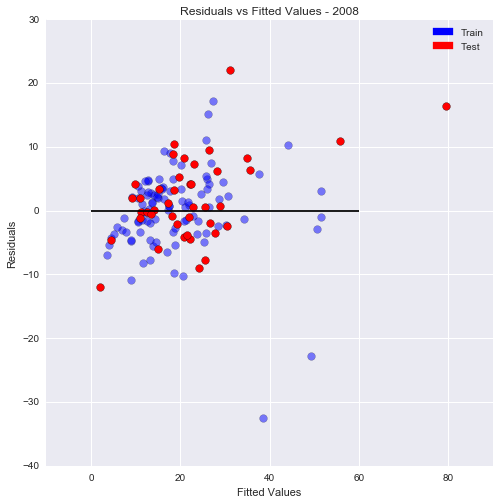

In [77]:
# 2008
plt.figure(figsize=(8,8))
plt.scatter(lm2008.predict(X2008_train), lm2008.predict(X2008_train) - Y2008_train, c='b', s=60, alpha=0.5)
plt.scatter(lm2008.predict(X2008_test), lm2008.predict(X2008_test) - Y2008_test, c='r', s=60)
plt.hlines(y = 0, xmin=0, xmax = 60)
plt.title('Residuals vs Fitted Values - 2008')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
blue_patch = mpatches.Patch(color='b', label='Train')
red_patch = mpatches.Patch(color ='r', label='Test')
plt.legend(handles=[blue_patch, red_patch])

**Although for the most part, the models are homoscedastic, both models show a small amount of heterscedasticity and some ceiling effects.**

**Let's see how these models behave with a more flexible model - Random Forest Regression.**

In [78]:
from sklearn.ensemble import RandomForestRegressor

# Create two instances of the Random Forest model.
rf2011 = RandomForestRegressor(random_state = 1)
rf2008 = RandomForestRegressor(random_state = 1)

# Now, train the model with all the 8 predictors only using the training set
rf2011.fit(X2011_train, Y2011_train)
rf2008.fit(X2008_train, Y2008_train)

# First, we can check to see how much of the variance in the training data is captured by the model.
# We can compute R-squared for this (also referred to as the coefficient of determination).
print "R-squared for training data - Year 2011: "
print rf2011.score(X2011_train,Y2011_train) 
print "R-squared for test data - Year 2011: "
print rf2011.score(X2011_test,Y2011_test) 
print
print "R-squared for training data - Year 2008: "
print rf2008.score(X2008_train,Y2008_train) 
print "R-squared for test data - Year 2008: "
print rf2008.score(X2008_test,Y2008_test) 
print

# Predict the output on the test set and print the first five values
print "Total major crime per 1000 for 5 five neighbourhoods in the test set - Year 2011:"
print rf2011.predict(X2011_test)[0:5]
print
print "Total major crime per 1000 for 5 five neighbourhoods in the test set - Year 2008:"
print rf2011.predict(X2008_test)[0:5]
print

# Look at the mean squared error on the test set first and then on the training set.
from sklearn.metrics import mean_squared_error
print "Mean squared error on the test set - Year 2011: "
print mean_squared_error(Y2011_test, rf2011.predict(X_test))
print "Mean squared error on the training set - Year 2011: "
print mean_squared_error(Y2011_train, rf2011.predict(X_train))
print
print "Mean squared error on the test set - Year 2008: "
print mean_squared_error(Y2008_test, rf2008.predict(X_test))
print "Mean squared error on the training set - Year 2008: "
print mean_squared_error(Y2008_train, rf2008.predict(X2008_train))

R-squared for training data - Year 2011: 
0.90810209001
R-squared for test data - Year 2011: 
0.433081455561

R-squared for training data - Year 2008: 
0.924488927523
R-squared for test data - Year 2008: 
0.611645600706

Total major crime per 1000 for 5 five neighbourhoods in the test set - Year 2011:
[ 19.36443642  24.00261533   9.47139405  12.75184862  24.39843898]

Total major crime per 1000 for 5 five neighbourhoods in the test set - Year 2008:
[ 21.6176344   22.65527017  10.94419173  12.39006113  24.35623476]

Mean squared error on the test set - Year 2011: 
118.422510495
Mean squared error on the training set - Year 2011: 
153.26885331

Mean squared error on the test set - Year 2008: 
156.427779532
Mean squared error on the training set - Year 2008: 
10.8570895024


**The evaluation results show some interesting points:**

**1. Random Forest models for both years fit well with the training data, based on the R-squared values.**

**2. The 2008 model seems to perform better with test data than the 2011 model, based on explained variance (R-squared).**

**3. But when we look at the MSE values for models from both years, the 2011 model performs better with the test data than the 2008 model, and both models do poorly on the training data in comparison to the linear regression values.**

**4. From the MSE values on the training data, it looks like the 2008 model is overfitted.**

**5. Various interesting extensions are possible for future work. Income data of some form should be included. Additional metrics that quantify urbanization should also be included. Both these variables can affect the crime within each neighbourhood. Also, the population of Toronto is estimated to grow by 30% within the next 25 years. So, some measure accounting for population growth should be included.**

In [79]:
# One additional thing we can do is find the most important features in the prediction models for 2008 and 2011.
rf2011.feature_importances_

array([ 0.19496693,  0.08830489,  0.05899666,  0.03671232,  0.04459215,
        0.20660158,  0.06922025,  0.30060522])

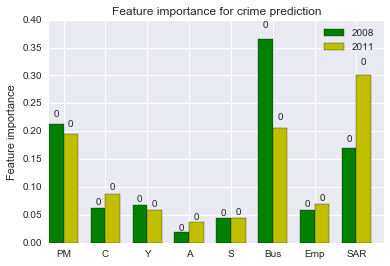

In [80]:
N = 8
fimp2008 = rf2008.feature_importances_

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars


fig, ax = plt.subplots()
fig = plt.figure(figsize=(8,8))
rects1 = ax.bar(ind, fimp2008, width, color='g')

fimp2011 = rf2011.feature_importances_
rects2 = ax.bar(ind + width, fimp2011, width, color='y')

# add some text for labels, title and axes ticks

ax.set_ylabel('Feature importance')
ax.set_title('Feature importance for crime prediction')
ax.set_xticks(ind + width)
ax.set_xticklabels(('PM', 'C', 'Y', 'A', 'S', 'Bus', 'Emp', 'SAR'))

ax.legend((rects1[0], rects2[0]), ('2008', '2011'))

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

**Random forest models for both years show that percentage of males, number of businesses, and number of social assistance recipients in a neighbourhood are the most important predictors for major crime in a neighbourhood. These findings are consistent with the 2011 linear regression model.**

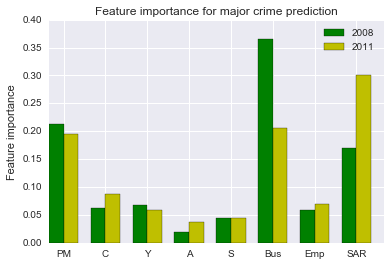

In [110]:
# Doing the same thing as above but (a) removing error bars
n = 8
fig, ax = plt.subplots()
bar_width = 0.35
bar_locations = np.arange(n)
rects1 = ax.bar(bar_locations, fimp2008, bar_width, color='g')
rects2 = ax.bar(bar_locations + bar_width, fimp2011, bar_width, color='y')
ax.set_ylabel('Feature importance')
ax.set_title('Feature importance for major crime prediction')
ax.set_xticks(ind + width)
ax.set_xticklabels(('PM', 'C', 'Y', 'A', 'S', 'Bus', 'Emp', 'SAR'))
ax.legend((rects1[0], rects2[0]), ('2008', '2011'))
plt.show()